## Imports

In [1]:
# utils
import os
import sys
from pathlib import Path

PROJECT_DIR = Path.cwd().parent
sys.path.append(str(PROJECT_DIR))

import string

# viz
import matplotlib.pyplot as plt
# basics
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

# metrics
from utils import config
from utils.reader import read_file_yaml

np.random.seed(0)

alphabet = string.ascii_lowercase

## Parameters

In [2]:
path_outputs = PROJECT_DIR / "outputs"
path_data = PROJECT_DIR / "data"
file_path_parameters = PROJECT_DIR / "conf" / "parameters.yml"

params = read_file_yaml(file_path_parameters)

ext_type = params["outputs"]["extension_type"]
ext_local_img = params["outputs"]["extension_local_img"]
ext_best_img = params["outputs"]["extension_best_img"]

file_path_data = {
    i: (path_data / i / Path(i + ext_type))
    if f"{i}_pca{ext_type}" not in os.listdir(path_data / i)
    else (path_data / i / Path(i + "_pca" + ext_type))
    for i in config.file_names
}

file_path_distribution = path_outputs / Path("dataset_distribution_labels" + ext_best_img)

## Read datasets

In [3]:
data = {}
for i_name, i_file_path in file_path_data.items():
    data[i_name] = {"content": pd.read_csv(i_file_path), "filepath": i_file_path}

## Plot

In [4]:
_params = {
    "x": "0",
    "y": "1",
    "palette": sns.color_palette("dark"),
    "s": 50,
    "legend": False,
}

/tmp/ipykernel_790094/1713989913.py:7: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(**tmp_params)
/tmp/ipykernel_790094/1713989913.py:7: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(**tmp_params)
/tmp/ipykernel_790094/1713989913.py:7: UserWarning: 
The palette list has fewer values (10) than needed (214) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(**tmp_params)
/tmp/ipykernel_790094/1713989913.py:7: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(**tmp_params)
/tmp/ipykernel_790094/1713989913.py:7: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(**tmp_params)
/tmp/ipykernel_790094/1713989913.py:7: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
 

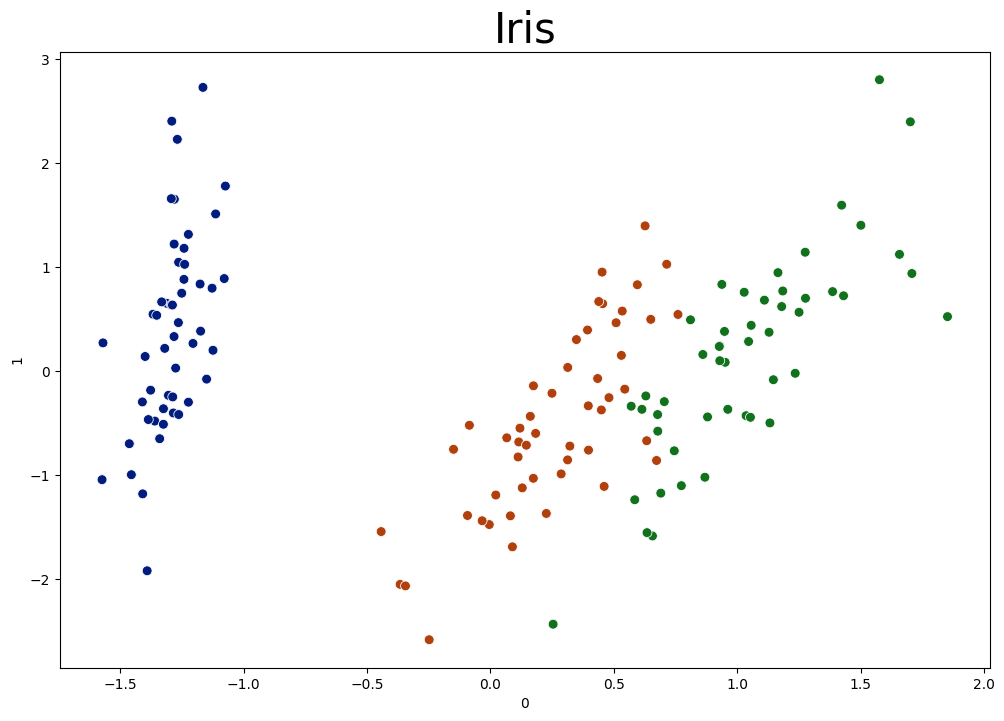

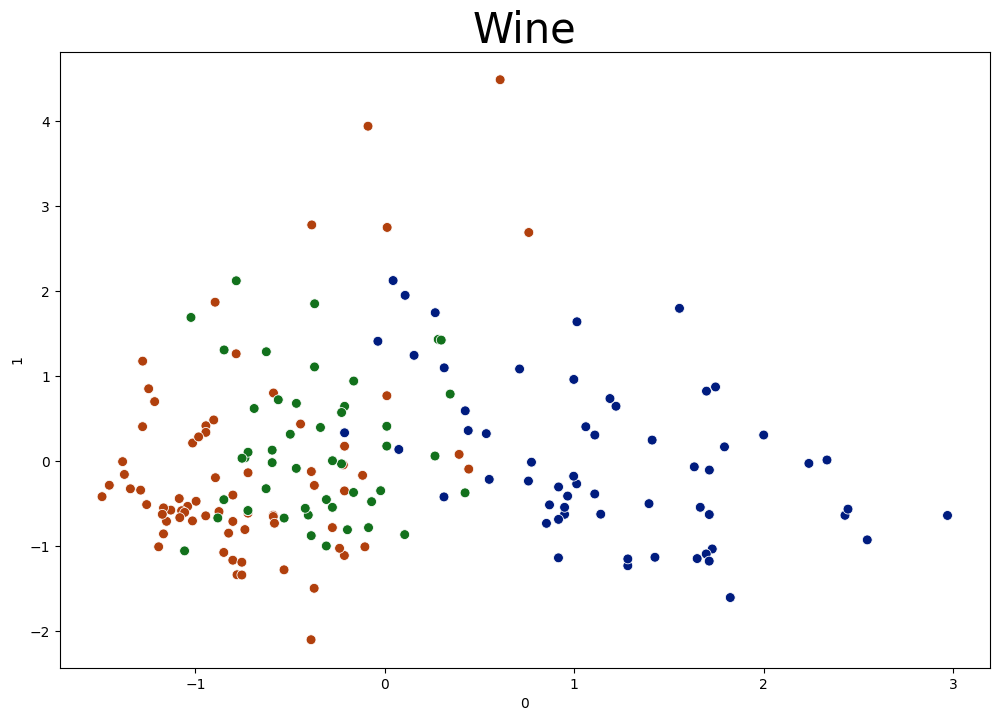

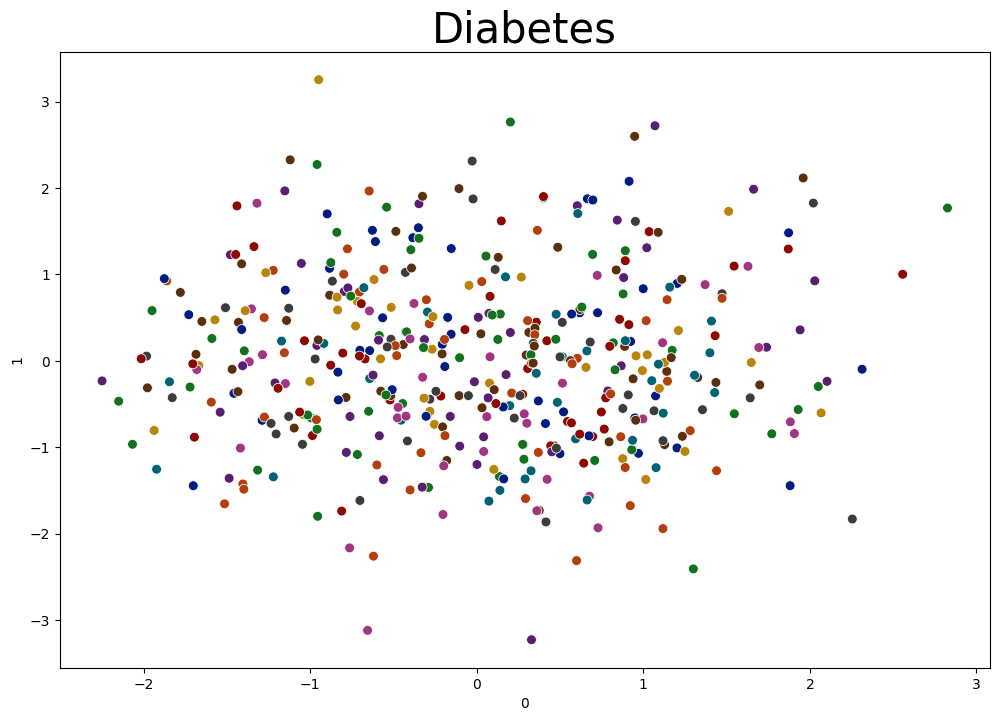

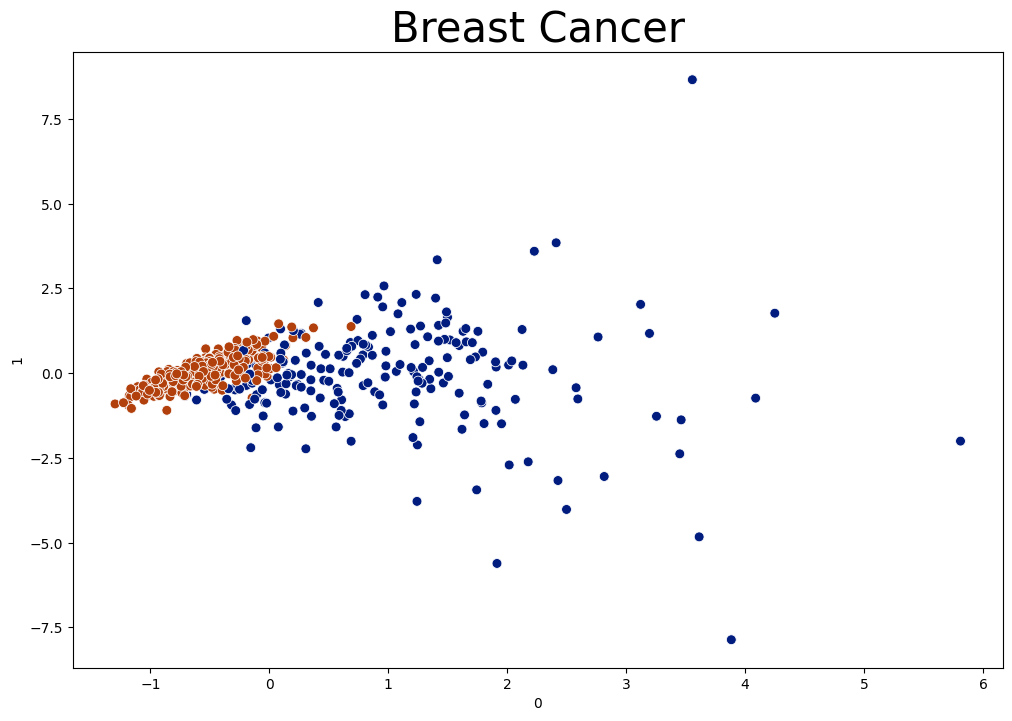

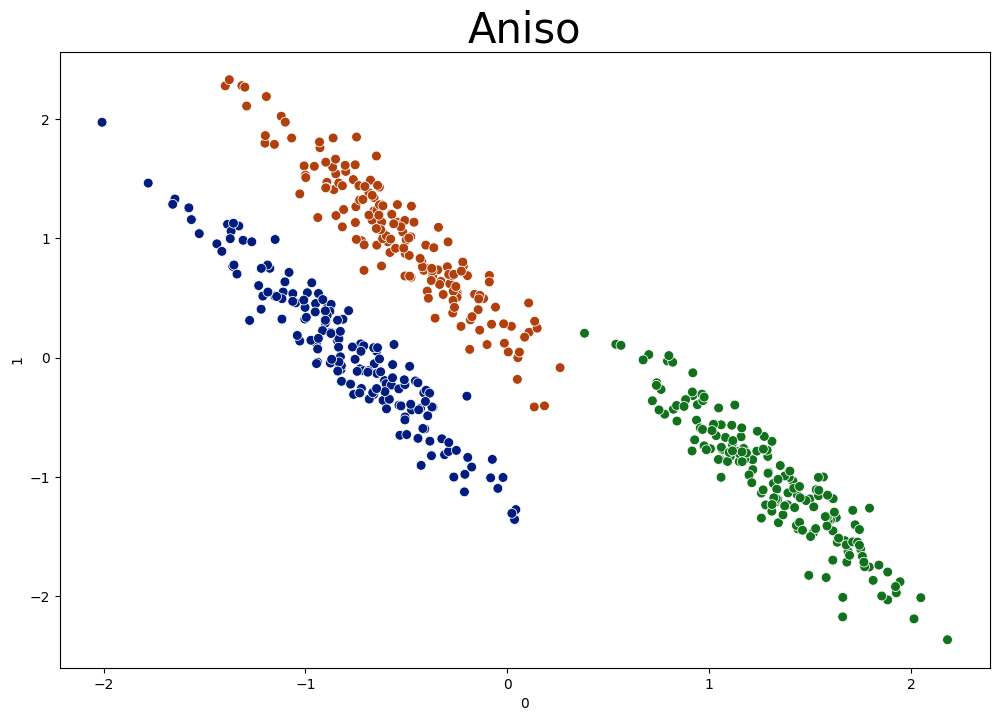

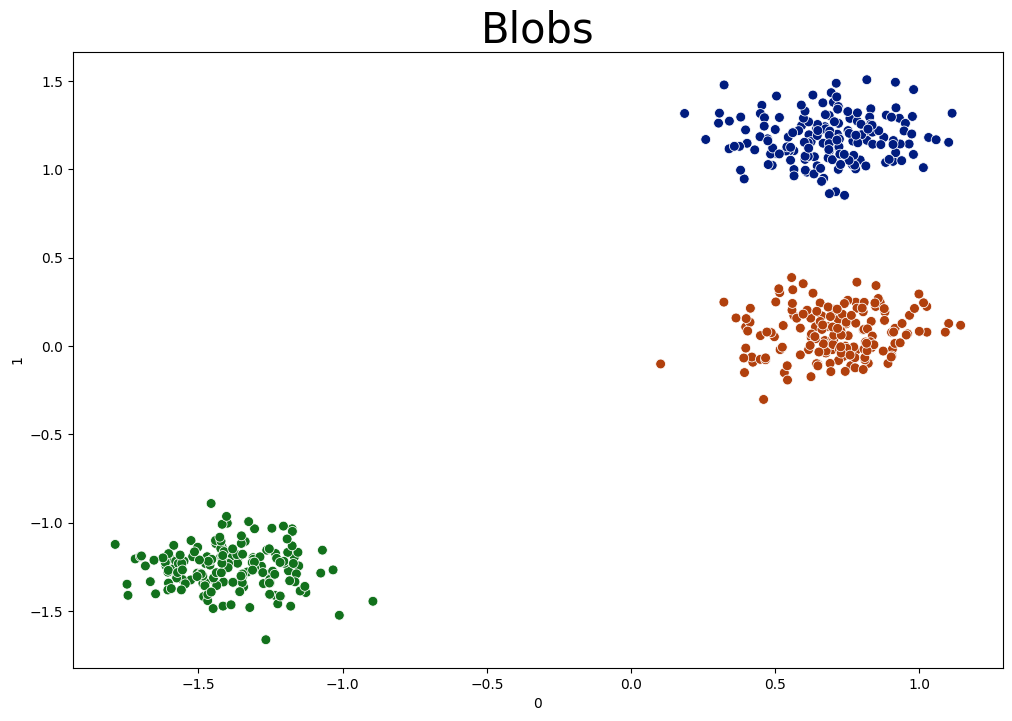

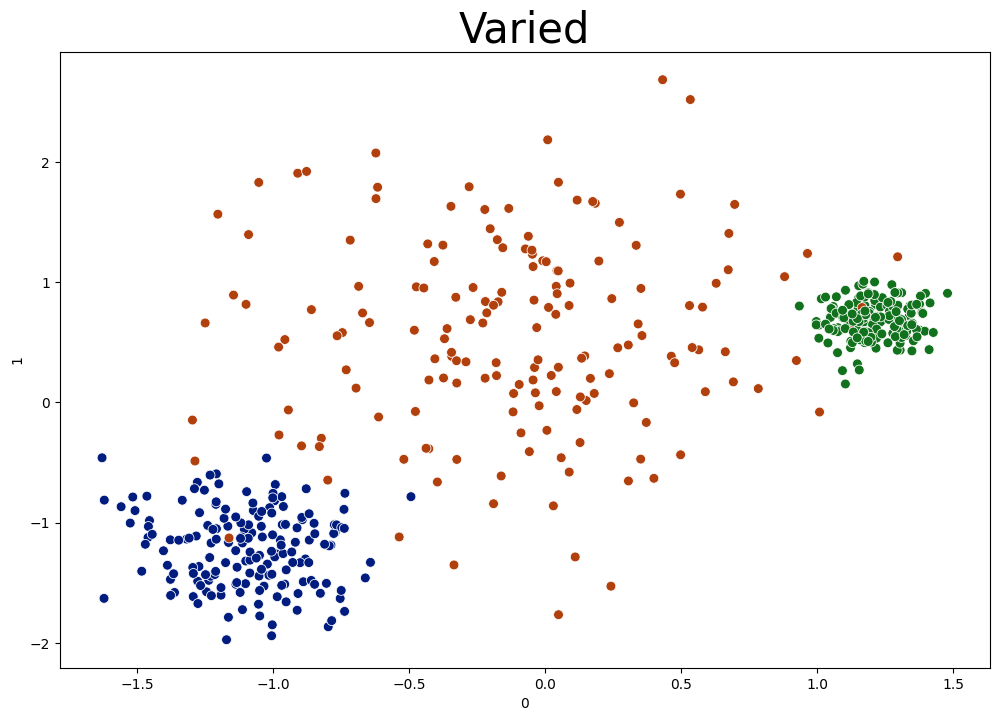

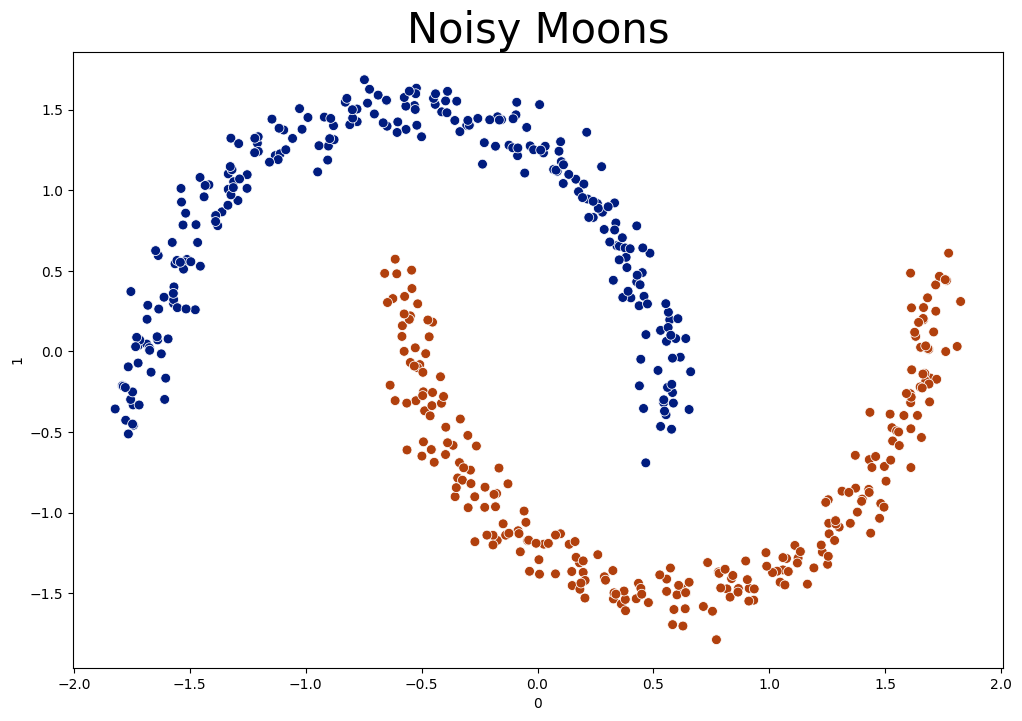

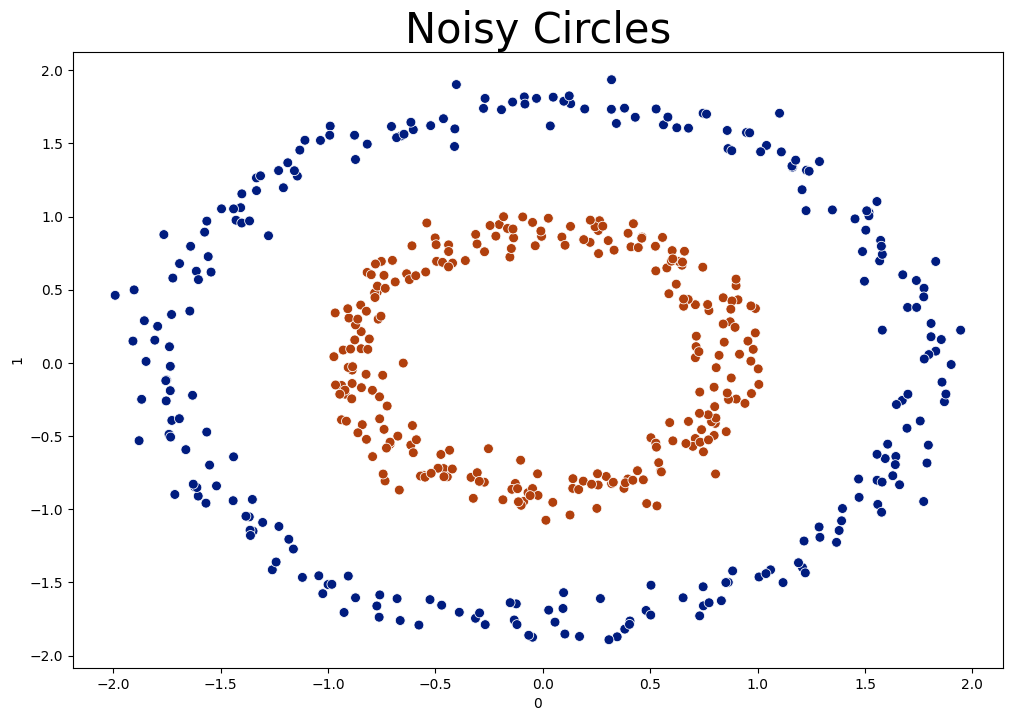

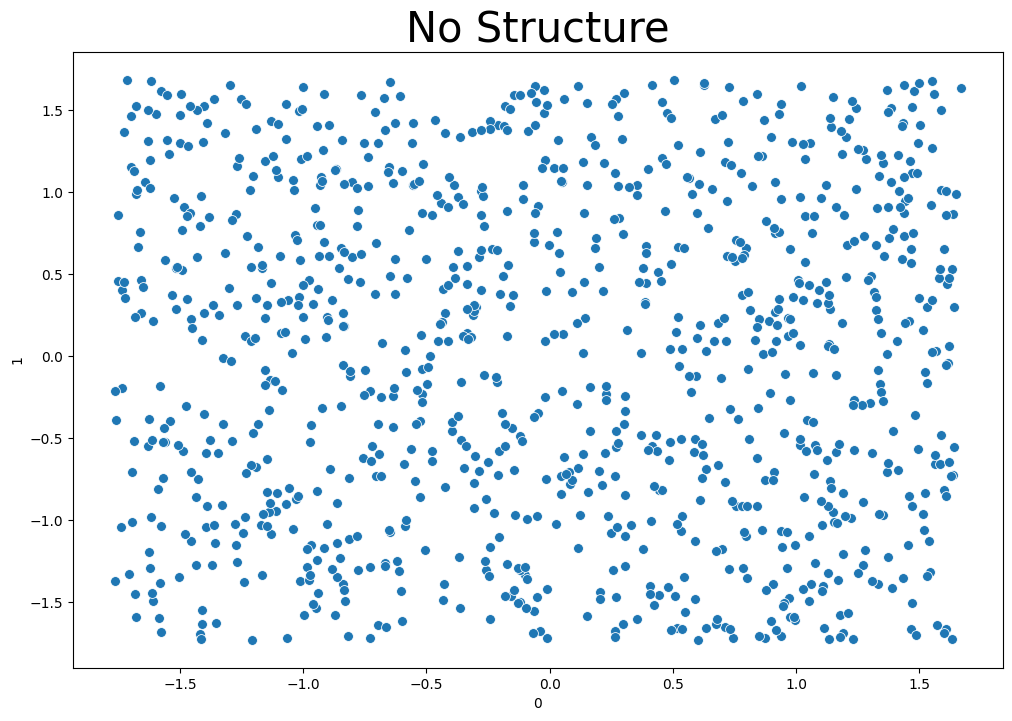

In [5]:
for i_name, i_data in tqdm(list(data.items())):
    if "no_structure" == i_name:
        tmp_params = _params | {"data": data[i_name]["content"]}
    else:
        tmp_params = _params | {"data": data[i_name]["content"], "hue": "labels"}
    plt.figure(figsize=(12, 8))
    sns.scatterplot(**tmp_params)
    txt = i_name.replace("_", " ").title()
    plt.title(txt, fontsize=30)
    plt.savefig(path_outputs / Path(i_name + "_behavior" + ext_best_img), format=ext_best_img[1:])

0it [00:00, ?it/s]/tmp/ipykernel_790094/2385600025.py:10: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_790094/2385600025.py:10: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(
2it [00:00, 14.83it/s]/tmp/ipykernel_790094/2385600025.py:10: UserWarning: 
The palette list has fewer values (10) than needed (214) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(
/tmp/ipykernel_790094/2385600025.py:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(
4it [00:00,  8.84it/s]/tmp/ipykernel_790094/2385600025.py:10: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_790094/2385600025.py:10: UserWarning: The palette list has more values (10) than needed (3), which may not be intended

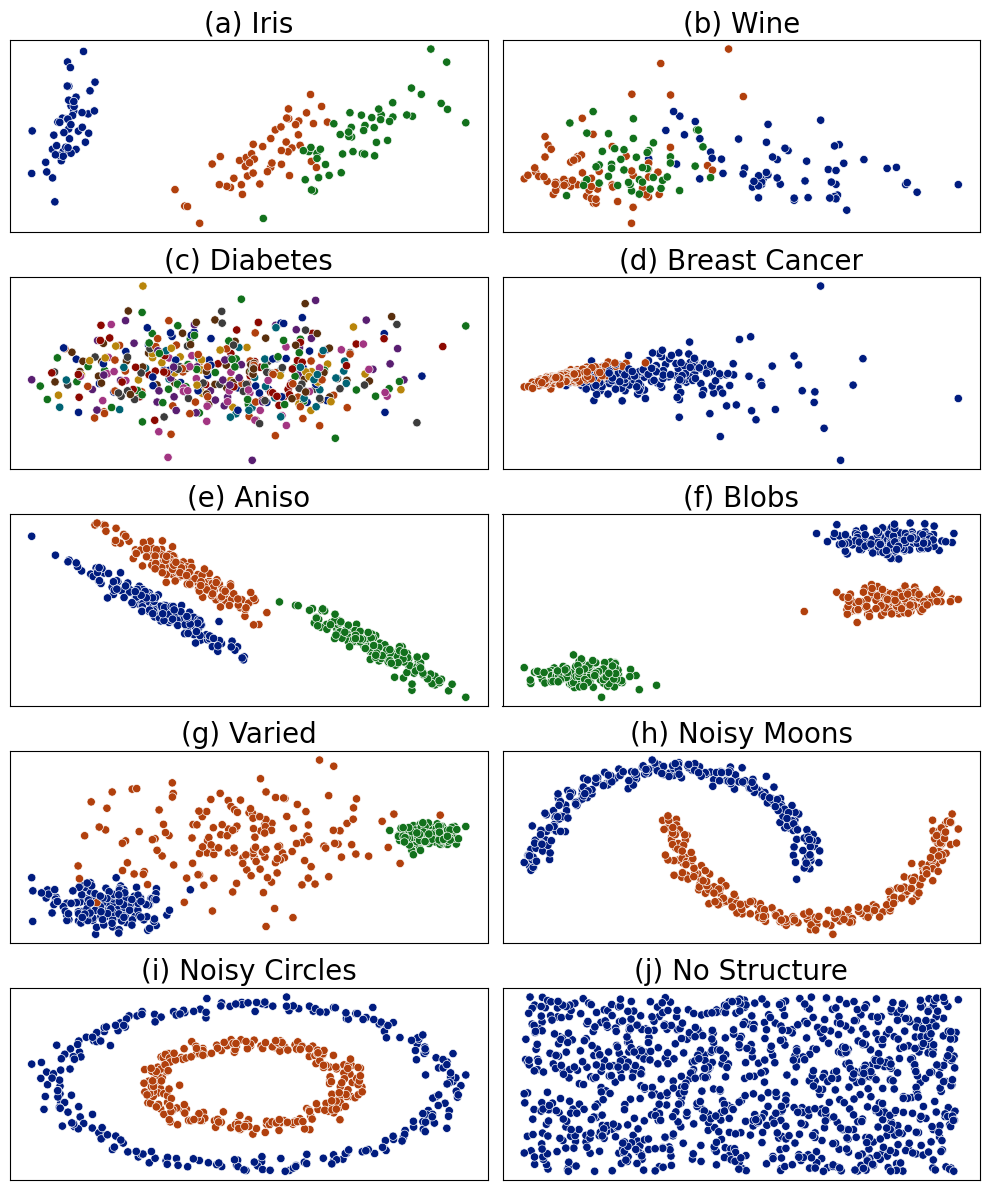

In [6]:
n_cols = 2
fig, axs = plt.subplots(int(np.ceil(len(data.items()) / n_cols)), n_cols, figsize=(10, 12))

# Loop
row = 0
col = 0
for letter, (key, iter_data) in tqdm(zip(alphabet, data.items())):
    if key == "no_structure":
        iter_data["content"].labels = 1
    sns.scatterplot(
        x="0",
        y="1",
        data=iter_data["content"],
        hue="labels",
        ax=axs[row, col],
        palette=sns.color_palette("dark"),
        legend=False,
    )
    axs[row, col].set_title(f"({letter}) " + key.replace("_", " ").title(), fontsize=20)
    axs[row, col].set_xlabel("")
    axs[row, col].set_ylabel("")
    axs[row, col].set_xticks([])
    axs[row, col].set_yticks([])
    col += 1
    if col == 2:
        col = 0
        row += 1
plt.tight_layout()
plt.savefig(file_path_distribution, format=ext_best_img[1:])  # best
plt.savefig(str(file_path_distribution).replace(ext_best_img, ext_local_img), format=ext_local_img[1:])  # local